### Logistic Regression and KNN model comparison exercise_Grace Jeong

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

In [28]:
data = pd.read_csv("data/pima_diabetes.csv")

In [29]:
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


Feature scaling and Outliers detection

In [30]:
print(data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


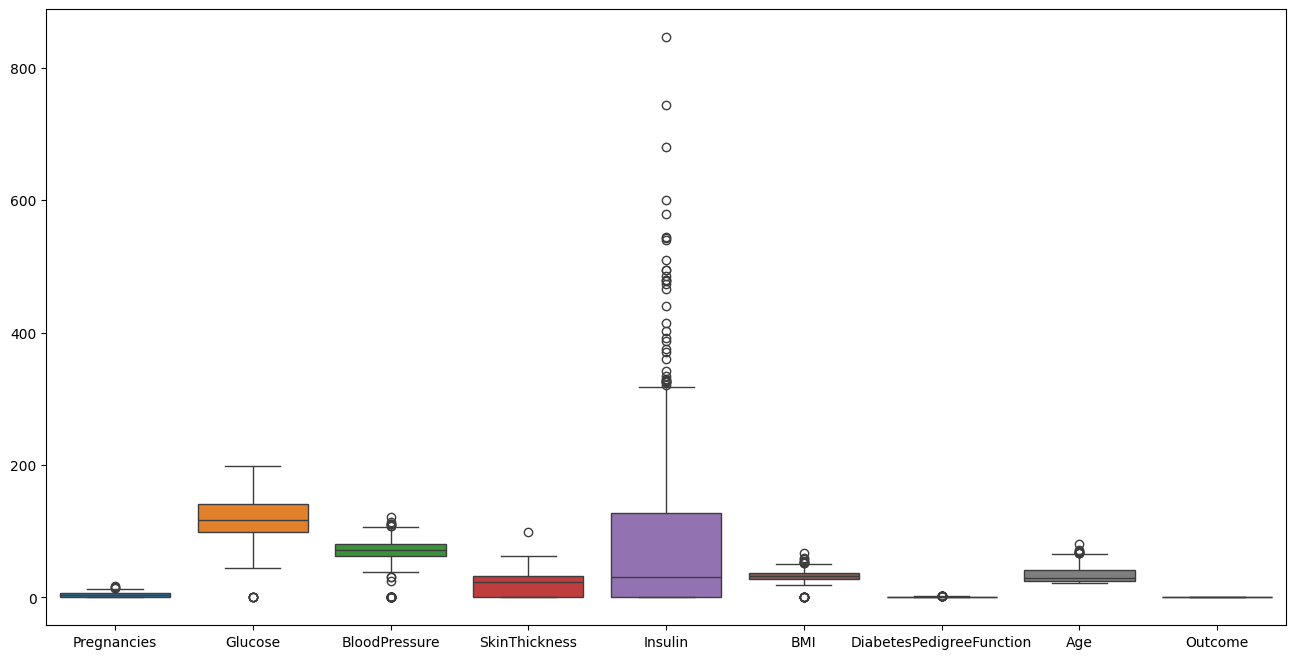

In [31]:
plt.figure(figsize=(16,8))
sns.boxplot(data=data)
plt.show()

Since it is a healthcare application and patient's information, i won't drop or replace any outliers.

In [32]:
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

split_ratios = {"70_30": 0.3, "60_40": 0.4}

X = data.drop(columns="Outcome")
Y = data["Outcome"]

rs = RobustScaler()

scaled_data = {}

for key, test_size in split_ratios.items():
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=42)

    X_scaled = rs.fit_transform(X_train)
    X_test_scaled = rs.transform(X_test)

    scaled_data[key] = {
        "X_train": X_scaled,
        "X_test": X_test_scaled,
        "Y_train": Y_train,
        "Y_test": Y_test
    }

### Logistic Regression

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def evaluate_model(model, scaled_data):

    for key, data_split in scaled_data.items():
        print(f"\nEvaluating model for the {key} split:\n")

        # extract data from each split
        X_scaled = data_split['X_train']
        X_test_scaled = data_split["X_test"]
        Y_train = data_split["Y_train"]
        Y_test = data_split["Y_test"]

        model.fit(X_scaled, Y_train)
            
        y_train_pred = model.predict(X_scaled)
        y_test_pred = model.predict(X_test_scaled)

        # Accuracy
        print("Train Accuracy:", accuracy_score(Y_train, y_train_pred))
        print("Test Accuracy:", accuracy_score(Y_test, y_test_pred))
        
        # Confusion Matrix (train)
        print("\nConfusion Matrix (Train):")
        sns.heatmap(confusion_matrix(Y_train, y_train_pred), annot=True, fmt='g', cmap='Oranges')
        plt.title(f'Train Confusion Matrix ({key} split)')
        plt.show()
        
        # Confusion Matrix (test)
        print("\nConfusion Matrix (Test):")
        sns.heatmap(confusion_matrix(Y_test, y_test_pred), annot=True, fmt='g', cmap='Greens')
        plt.title(f'Test Confusion Matrix ({key} split)')
        plt.show()

        # Classification Report (train)
        target_names = ['without diabetes', 'with diabetes']
        print("\nClassification Report (Train):")
        print(classification_report(Y_train, y_train_pred, target_names=target_names))

        # Classification Report (test)
        print("\nClassification Report (Test):")
        print(classification_report(Y_test, y_test_pred, target_names=target_names))


Evaluating model for the 70_30 split:

Train Accuracy: 0.7839851024208566
Test Accuracy: 0.7359307359307359

Confusion Matrix (Train):


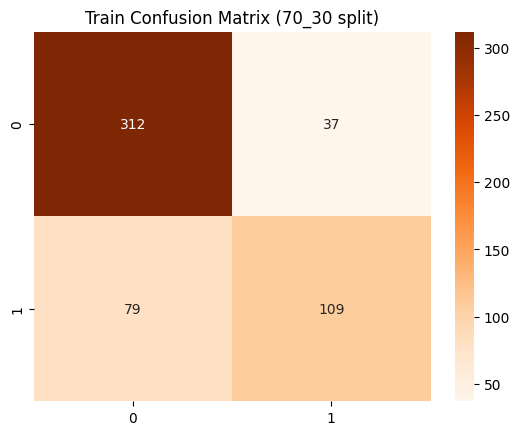


Confusion Matrix (Test):


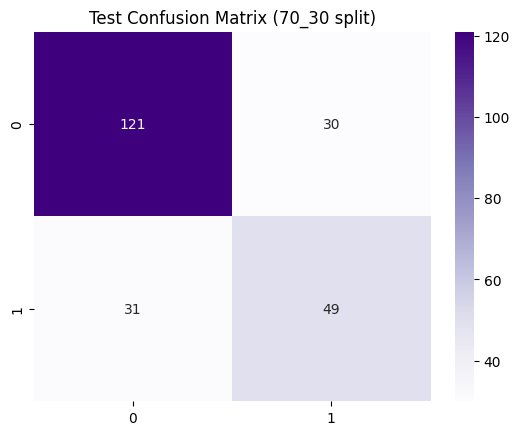


Classification Report (Train):
                  precision    recall  f1-score   support

without diabetes       0.80      0.89      0.84       349
   with diabetes       0.75      0.58      0.65       188

        accuracy                           0.78       537
       macro avg       0.77      0.74      0.75       537
    weighted avg       0.78      0.78      0.78       537


Classification Report (Test):
                  precision    recall  f1-score   support

without diabetes       0.80      0.80      0.80       151
   with diabetes       0.62      0.61      0.62        80

        accuracy                           0.74       231
       macro avg       0.71      0.71      0.71       231
    weighted avg       0.74      0.74      0.74       231


Evaluating model for the 60_40 split:

Train Accuracy: 0.7695652173913043
Test Accuracy: 0.7564935064935064

Confusion Matrix (Train):


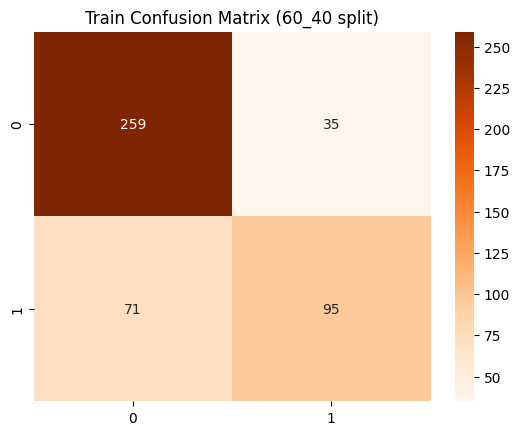


Confusion Matrix (Test):


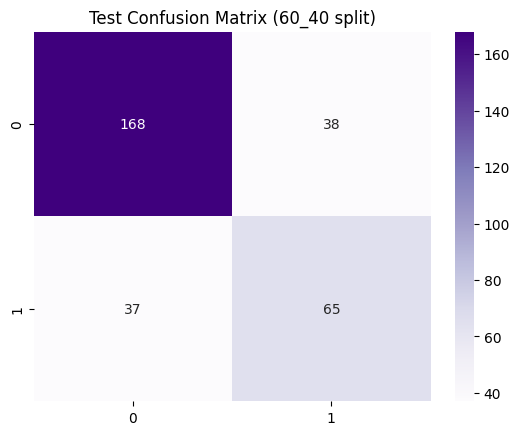


Classification Report (Train):
                  precision    recall  f1-score   support

without diabetes       0.78      0.88      0.83       294
   with diabetes       0.73      0.57      0.64       166

        accuracy                           0.77       460
       macro avg       0.76      0.73      0.74       460
    weighted avg       0.77      0.77      0.76       460


Classification Report (Test):
                  precision    recall  f1-score   support

without diabetes       0.82      0.82      0.82       206
   with diabetes       0.63      0.64      0.63       102

        accuracy                           0.76       308
       macro avg       0.73      0.73      0.73       308
    weighted avg       0.76      0.76      0.76       308



In [47]:
lr = LogisticRegression(random_state=16, max_iter=500)
evaluate_model(lr, scaled_data)

#### Observations (70/30):

- True Negatives (TN) = 121

    The model correctly predicted 78 people as "No Diabetes."

- False Positives (FP) = 30

    The model incorrectly predicted 21 people as having diabetes when they actually didn't (Type I error).

- False Negatives (FN) = 31

    The model incorrectly predicted 18 people as "No Diabetes" when they actually had diabetes (Type II error).

- True Positives (TP) = 49

    The model correctly predicted 49 people as having diabetes.

Accuracy = 74% → The model correctly classifies 74% of all instances in the dataset. 

- Precision (Positive Predictive Value): 

    Without diabetes: 0.80 → When the model predicts "without diabetes", it's correct 80% of the time. 

    With diabetes: 0.62 → When the model predicts "with diabetes", it's correct 62% of the time.

- Recall (Sensitivity/True Positive Rate): 

    Without diabetes: 0.80 → The model correctly identifies 80% of all actual "without diabetes" cases. 

    With diabetes: 0.61 → The model correctly identifies 61% of all actual "with diabetes" cases.

- F1-score (Balance between Precision & Recall): 

    Without diabetes: 0.80 

    With diabetes: 0.62

    Since the F1-score for "with diabetes" is lower, the model struggles more with correctly predicting positive cases.

- The model performs better in predicting "without diabetes" than "with diabetes" (higher precision, recall, and F1-score). The imbalance in class distribution (151 vs. 80) might be causing the lower performance for "with diabetes" cases. The recall for "with diabetes" is 0.61, meaning 39% of actual diabetes cases are misclassified. This could be a problem in a medical setting where missing a diabetes diagnosis is critical.

- The training accuracy is of 78% and test accuracy is of 73.5%, indicating slightly overfitting for 70/30 split logistic regression.

- Possible Solutions: Cross-Validation, Featrue selection, Hyperparameter Tuning

#### Observations (60/40):

- True Negatives (TN) = 168

    The model correctly predicted 168 people as "No Diabetes."

- False Positives (FP) = 38

    The model incorrectly predicted 38 people as having diabetes when they actually didn't (Type I error).

- False Negatives (FN ) = 37

    The model incorrectly predicted 37 people as "No Diabetes" when they actually had diabetes (Type II error).

- True Positives (TP) = 65

    The model correctly predicted 65 people as having diabetes.

Accuracy = 76% → The model correctly classifies 76% of all instances in the dataset. 

- Precision (Positive Predictive Value): 
    Without diabetes: 0.82 → When the model predicts "without diabetes", it's correct 82% of the time. 

    With diabetes: 0.63 → When the model predicts "with diabetes", it's correct 63% of the time.

- Recall (Sensitivity/True Positive Rate): 

    Without diabetes: 0.82 → The model correctly identifies 82% of all actual "without diabetes" cases. 

    With diabetes: 0.64 → The model correctly identifies 64% of all actual "with diabetes" cases.

- F1-score (Balance between Precision & Recall): 

    Without diabetes: 0.82

    With diabetes: 0.63

    Since the F1-score for "with diabetes" is lower, the model struggles more with correctly predicting positive cases.

- The model performs better in predicting "without diabetes" than "with diabetes" (higher precision, recall, and F1-score). The imbalance in class distribution (206 vs. 102) might be causing the lower performance for "with diabetes" cases. The recall for "with diabetes" is 0.64, meaning 36% of actual diabetes cases are misclassified. This could be a problem in a medical setting where missing a diabetes diagnosis is critical.

- The training accuracy is of 77% and the test accuracy is of 75.6%. They are close to each other so doesn't seem to be significant overfitting or underfitting.

### KNN


Evaluating model for the 70_30 split:

Train Accuracy: 0.8305400372439479
Test Accuracy: 0.7012987012987013

Confusion Matrix (Train):


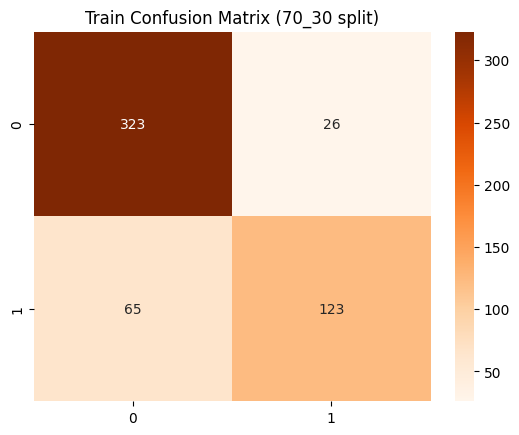


Confusion Matrix (Test):


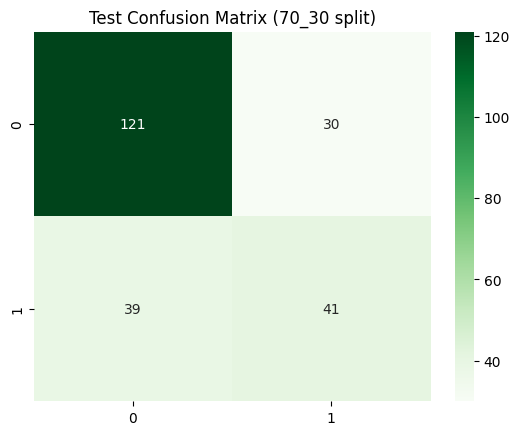


Classification Report (Train):
                  precision    recall  f1-score   support

without diabetes       0.83      0.93      0.88       349
   with diabetes       0.83      0.65      0.73       188

        accuracy                           0.83       537
       macro avg       0.83      0.79      0.80       537
    weighted avg       0.83      0.83      0.83       537


Classification Report (Test):
                  precision    recall  f1-score   support

without diabetes       0.76      0.80      0.78       151
   with diabetes       0.58      0.51      0.54        80

        accuracy                           0.70       231
       macro avg       0.67      0.66      0.66       231
    weighted avg       0.69      0.70      0.70       231


Evaluating model for the 60_40 split:

Train Accuracy: 0.8195652173913044
Test Accuracy: 0.7305194805194806

Confusion Matrix (Train):


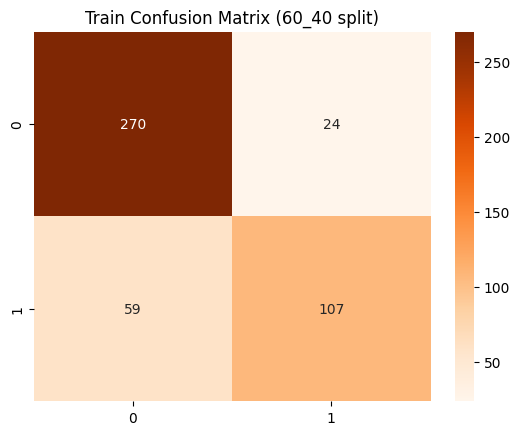


Confusion Matrix (Test):


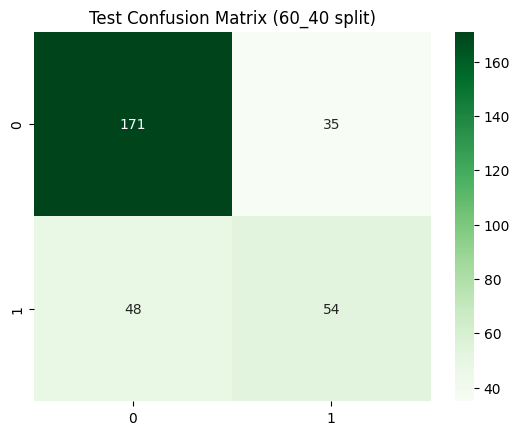


Classification Report (Train):
                  precision    recall  f1-score   support

without diabetes       0.82      0.92      0.87       294
   with diabetes       0.82      0.64      0.72       166

        accuracy                           0.82       460
       macro avg       0.82      0.78      0.79       460
    weighted avg       0.82      0.82      0.81       460


Classification Report (Test):
                  precision    recall  f1-score   support

without diabetes       0.78      0.83      0.80       206
   with diabetes       0.61      0.53      0.57       102

        accuracy                           0.73       308
       macro avg       0.69      0.68      0.69       308
    weighted avg       0.72      0.73      0.73       308



In [60]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

knn = KNeighborsClassifier()
evaluate_model(knn, scaled_data)

#### Observation:

Both model (70/30, 60/40) perform well on the training data but has a lower performance on the test data, indicating some overfitting. I'll tune the hyperparameter for the better performance.

### Elbow Method

In [66]:
#Test different values of k to perform KNN  (70/30)
error_rates = []
k_range = range(1, 101)

data_split = scaled_data["70_30"]

X_scaled = data_split['X_train']
X_test_scaled = data_split["X_test"]
Y_train = data_split["Y_train"]
Y_test = data_split["Y_test"]

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    
    knn.fit(X_scaled, Y_train)
    y_test_pred = knn.predict(X_test_scaled)

    error = 1 - accuracy_score(Y_test, y_test_pred)
    error_rates.append(error)

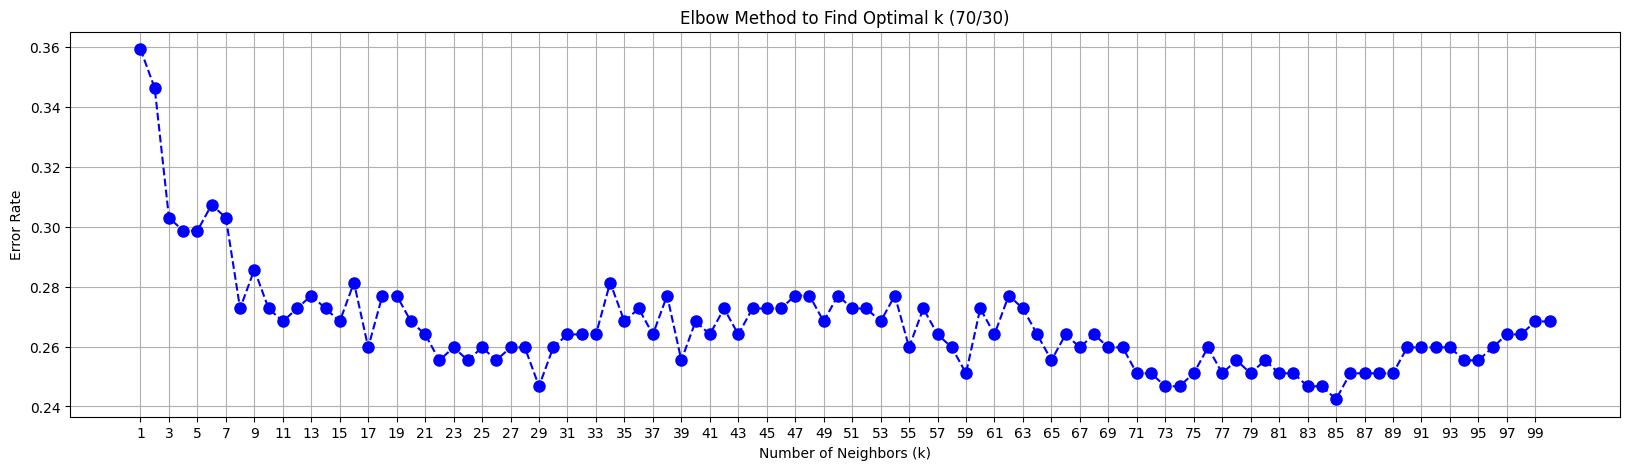

In [67]:
#Plot the elbow curve to find the optimal value of k  (70/30)
plt.figure(figsize=(20, 5))
plt.plot(k_range, error_rates, marker='o', linestyle='dashed', color='b', markersize=8)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error Rate')
plt.title('Elbow Method to Find Optimal k (70/30)')
plt.xticks(np.arange(1, 101, step=2))
plt.grid(True)
plt.show()

#### Observation (70/30): 
The error rate significantly decreased when k=85. After that, we don't see any further dip. 

In [69]:
# Calculate test accuracy when k=85
optimal_k = 85
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
knn_optimal.fit(X_scaled, Y_train)
y_pred_optimal = knn_optimal.predict(X_test_scaled)
print(f"Accuracy score for KNN with {optimal_k} neighbors : {accuracy_score(Y_test, y_pred_optimal):.2f}")

Accuracy score for KNN with 85 neighbors : 0.76



Evaluating model for the 70_30 split:

Train Accuracy: 0.74487895716946
Test Accuracy: 0.7575757575757576

Confusion Matrix (Train):


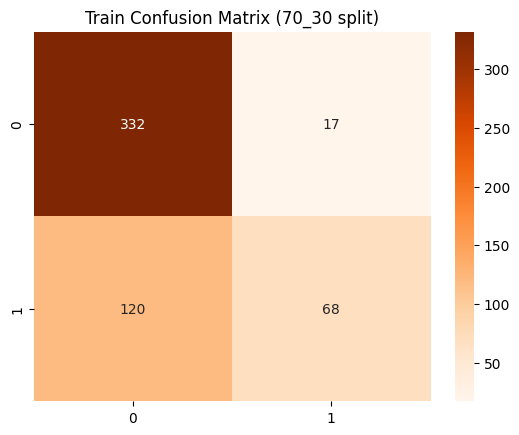


Confusion Matrix (Test):


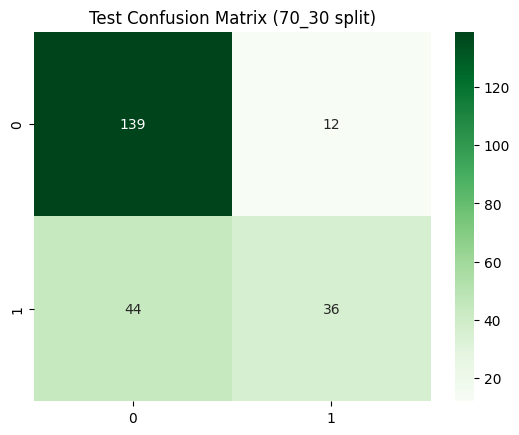


Classification Report (Train):
                  precision    recall  f1-score   support

without diabetes       0.73      0.95      0.83       349
   with diabetes       0.80      0.36      0.50       188

        accuracy                           0.74       537
       macro avg       0.77      0.66      0.66       537
    weighted avg       0.76      0.74      0.71       537


Classification Report (Test):
                  precision    recall  f1-score   support

without diabetes       0.76      0.92      0.83       151
   with diabetes       0.75      0.45      0.56        80

        accuracy                           0.76       231
       macro avg       0.75      0.69      0.70       231
    weighted avg       0.76      0.76      0.74       231


Evaluating model for the 60_40 split:

Train Accuracy: 0.7282608695652174
Test Accuracy: 0.7467532467532467

Confusion Matrix (Train):


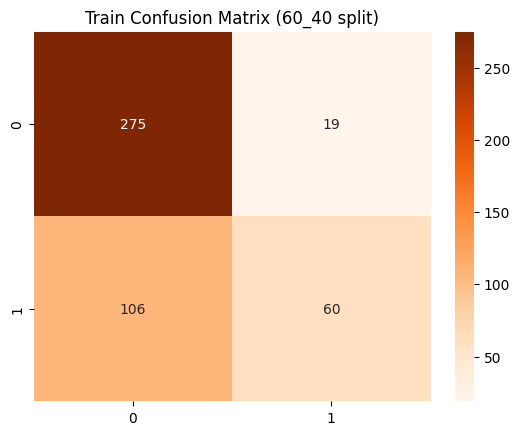


Confusion Matrix (Test):


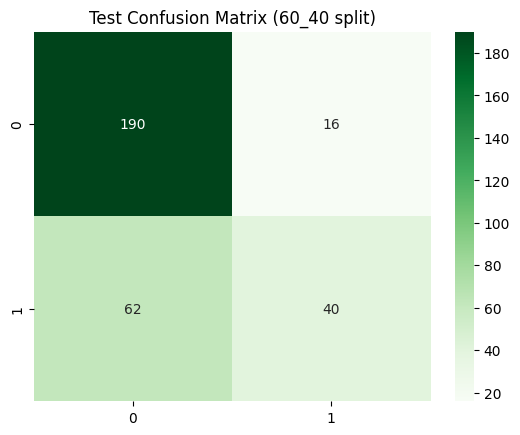


Classification Report (Train):
                  precision    recall  f1-score   support

without diabetes       0.72      0.94      0.81       294
   with diabetes       0.76      0.36      0.49       166

        accuracy                           0.73       460
       macro avg       0.74      0.65      0.65       460
    weighted avg       0.74      0.73      0.70       460


Classification Report (Test):
                  precision    recall  f1-score   support

without diabetes       0.75      0.92      0.83       206
   with diabetes       0.71      0.39      0.51       102

        accuracy                           0.75       308
       macro avg       0.73      0.66      0.67       308
    weighted avg       0.74      0.75      0.72       308



In [70]:
knn = KNeighborsClassifier(n_neighbors=85)
evaluate_model(knn, scaled_data)

### Observation (70/30): 
There is no severe outfitting found from the training and testing accuracies. The test accuracy is slightly higher, suggesting a better generalization on unseen data.

The results suggest k = 85 is a suitable choice for the KNN model.

### Plot the AUC-ROC curve to compare the performances of Logistic Regression and KNN

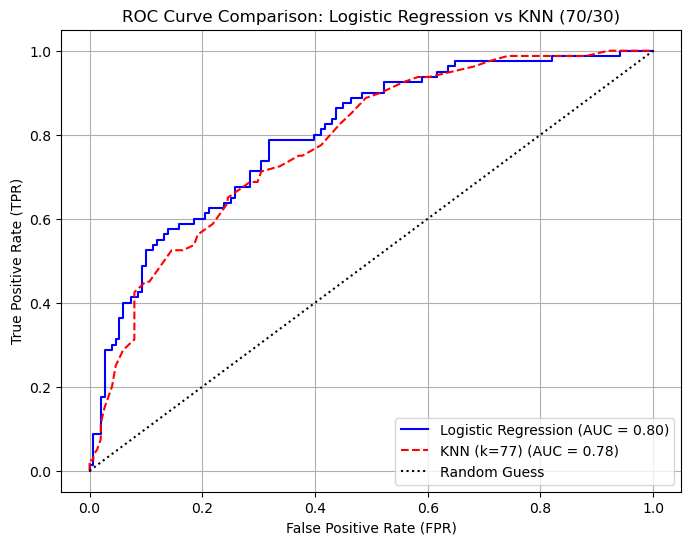

In [ ]:
Y_lr_probs = lr.predict_proba(X_test_70_scaled)[:, 1]
Y_knn_77_probs = knn_77.predict_proba(X_test_70_scaled)[:, 1]

# Compute ROC curve and AUC for both models
fpr_lr, tpr_lr, _ = roc_curve(Y_test_70, Y_lr_probs)
auc_log = auc(fpr_lr, tpr_lr)

fpr_knn, tpr_knn, _ = roc_curve(Y_test_70, Y_knn_77_probs)
auc_knn = auc(fpr_knn, tpr_knn)

# Plot both ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='blue', label=f'Logistic Regression (AUC = {auc_log:.2f})')
plt.plot(fpr_knn, tpr_knn, color='red', linestyle='dashed', label=f'KNN (k=77) (AUC = {auc_knn:.2f})')

# Random guess line
plt.plot([0, 1], [0, 1], color='black', linestyle='dotted', label='Random Guess')

# Labels and Title
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve Comparison: Logistic Regression vs KNN (70/30)")
plt.legend()
plt.grid(True)
plt.show()

### Observation (70/30): The model that is closer to top left is the better performing model. Here Logistic Regression is better performing model, since the AUC score is higher than KNN. This means that Logistic Regression provides a better balance in predicting patients that are diabetic and not diabetic.

In [ ]:
#Test different values of k to perform KNN  (60/40)
error_rates = []
k_values_60 = range(1, 101)
for k in k_values_60:
    knn_60 = KNeighborsClassifier(n_neighbors=k)
    knn_60.fit(X_train_60_scaled, Y_train_60)  # Train the model
    Y_pred = knn_60.predict(X_test_60_scaled)  # Predict on test set
    error = 1 - accuracy_score(Y_test_60, Y_pred)  # Calculate error rate
    error_rates.append(error)

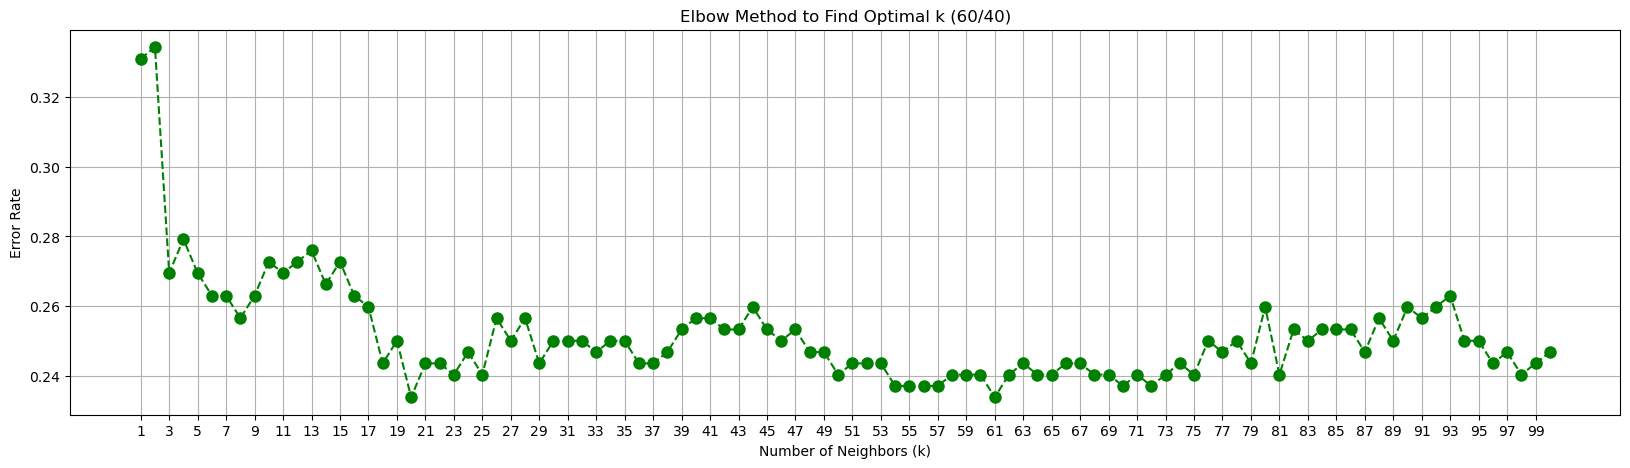

In [ ]:
#Plot the elbow curve to find the optimal value of k
plt.figure(figsize=(20, 5))
plt.plot(k_values_60, error_rates, marker='o', linestyle='dashed', color='g', markersize=8)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error Rate')
plt.title('Elbow Method to Find Optimal k (60/40)')
plt.xticks(np.arange(1, 101, step=2))
plt.grid(True)
plt.show()

### Observation (60/40): The error rate significantly decreased when k=20 and k=61. After that, we don't see any further dip. 

In [ ]:
### Calculate test accuracy when k=20

knn_20 = KNeighborsClassifier(n_neighbors=20)
knn_20.fit(X_train_60_scaled, Y_train_60)
Y_pred_20 = knn_20.predict(X_test_60_scaled)
print(f"Accuracy score for KNN with 20 neighbors : {accuracy_score(Y_test_60, Y_pred_20)}")

Accuracy score for KNN with 20 neighbors : 0.7662337662337663


In [ ]:
### Calculate test accuracy when k=61

knn_61 = KNeighborsClassifier(n_neighbors=61)
knn_61.fit(X_train_60_scaled, Y_train_60)
Y_pred_61 = knn_61.predict(X_test_60_scaled)
print(f"Accuracy score for KNN with 61 neighbors : {accuracy_score(Y_test_60, Y_pred_61)}")

Accuracy score for KNN with 61 neighbors : 0.7662337662337663


### Observation (60/40): Since the accuracy score is same for both k=20 and k=61, further perform cross validation

In [ ]:
from sklearn.model_selection import cross_val_score
from statistics import mean

In [ ]:
#Calculate cross validation score k=20 and k=61
score_k_20 = cross_val_score(knn_20, X_train_60_scaled, Y_train_60, cv=5)
score_k_61 = cross_val_score(knn_61, X_train_60_scaled, Y_train_60, cv=5)
avg_score_k_20 = mean(score_k_20)
avg_score_k_61 = mean(score_k_61)

print(f"Average score for 20 neighbors: {avg_score_k_20}")
print(f"Average score for 61 neighbors: {avg_score_k_61}")

Average score for 20 neighbors: 0.7652173913043478
Average score for 61 neighbors: 0.7347826086956522


### Observation (60/40): Since the cross validation score is higher for 20 neighbors compared to 61, k=20 is choosen as optimal k to perform KNN

### Plot the AUC-ROC curve to compare the performances of Logistic Regression and KNN

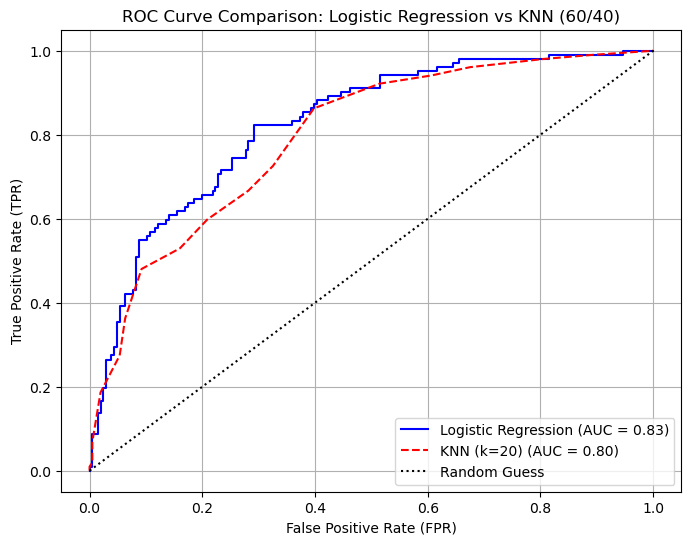

In [ ]:
Y_lr_probs = lr.predict_proba(X_test_60_scaled)[:, 1]
Y_knn_20_probs = knn_20.predict_proba(X_test_60_scaled)[:, 1]

# Compute ROC curve and AUC for both models
fpr_lr, tpr_lr, _ = roc_curve(Y_test_60, Y_lr_probs)
auc_log = auc(fpr_lr, tpr_lr)

fpr_knn, tpr_knn, _ = roc_curve(Y_test_60, Y_knn_20_probs)
auc_knn = auc(fpr_knn, tpr_knn)

# Plot both ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='blue', label=f'Logistic Regression (AUC = {auc_log:.2f})')
plt.plot(fpr_knn, tpr_knn, color='red', linestyle='dashed', label=f'KNN (k=20) (AUC = {auc_knn:.2f})')

# Random guess line
plt.plot([0, 1], [0, 1], color='black', linestyle='dotted', label='Random Guess')

# Labels and Title
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve Comparison: Logistic Regression vs KNN (60/40)")
plt.legend()
plt.grid(True)
plt.show()

### Observation (60/40): 

The model that is closer to top left is the better performing model. Here Logistic Regression is better performing model, since the AUC score is higher than KNN. This means that Logistic Regression provides a better balance in predicting patients that are diabetic and not diabetic.

### Compute training and test accuracy

#### Logistic Regression (70/30)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Train Logistic Regression
lr = LogisticRegression()
lr.fit(X_train_70_scaled, Y_train_70)

# Predictions
Y_train_pred_lr = lr.predict(X_train_70_scaled)
Y_test_pred_lr = lr.predict(X_test_70_scaled)

# Accuracy
train_acc_lr = accuracy_score(Y_train_70, Y_train_pred_lr)
test_acc_lr = accuracy_score(Y_test_70, Y_test_pred_lr)

print(f"Logistic Regression Training Accuracy: {train_acc_lr:.4f}")
print(f"Logistic Regression Test Accuracy: {test_acc_lr:.4f}")


Logistic Regression Training Accuracy: 0.7840
Logistic Regression Test Accuracy: 0.7359


#### KNN (70/30)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

optimal_k = 77
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train_70_scaled, Y_train_70)

# Predictions
Y_train_pred_knn = knn.predict(X_train_70_scaled)
Y_test_pred_knn = knn.predict(X_test_70_scaled)

# Accuracy
train_acc_knn = accuracy_score(Y_train_70, Y_train_pred_knn)
test_acc_knn = accuracy_score(Y_test_70, Y_test_pred_knn)

print(f"KNN Training Accuracy (k={optimal_k}): {train_acc_knn:.4f}")
print(f"KNN Test Accuracy (k={optimal_k}): {test_acc_knn:.4f}")


KNN Training Accuracy (k=77): 0.7561
KNN Test Accuracy (k=77): 0.7489


#### Overfitting: Training Accracy > Test Accuracy

* Accuracy Gap of Logistic Regression (70/30): 4.8%

There is a slight difference between training and test accuracy, but it's not large. No strong signs of overfitting. The model generalized reasonably well.

* Accuracy Gap of KNN (70/30): 0.72%

The training and test accuracy are almost identical. No overfitting was detected. The model is well-balanced.

#### Logistic Regression (60/40)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Train Logistic Regression
lr = LogisticRegression()
lr.fit(X_train_60_scaled, Y_train_60)

# Predictions
Y_train_pred_lr = lr.predict(X_train_60_scaled)
Y_test_pred_lr = lr.predict(X_test_60_scaled)

# Accuracy
train_acc_lr = accuracy_score(Y_train_60, Y_train_pred_lr)
test_acc_lr = accuracy_score(Y_test_60, Y_test_pred_lr)

print(f"Logistic Regression Training Accuracy: {train_acc_lr:.4f}")
print(f"Logistic Regression Test Accuracy: {test_acc_lr:.4f}")


Logistic Regression Training Accuracy: 0.7696
Logistic Regression Test Accuracy: 0.7565


#### KNN (60/40)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

optimal_k = 20
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train_60_scaled, Y_train_60)

# Predictions
Y_train_pred_knn = knn.predict(X_train_60_scaled)
Y_test_pred_knn = knn.predict(X_test_60_scaled)

# Accuracy
train_acc_knn = accuracy_score(Y_train_60, Y_train_pred_knn)
test_acc_knn = accuracy_score(Y_test_60, Y_test_pred_knn)

print(f"KNN Training Accuracy (k={optimal_k}): {train_acc_knn:.4f}")
print(f"KNN Test Accuracy (k={optimal_k}): {test_acc_knn:.4f}")


KNN Training Accuracy (k=20): 0.7957
KNN Test Accuracy (k=20): 0.7662


#### Overfitting: Training Accracy > Test Accuracy

* Accuracy Gap of Logistic Regression (60/40): 1.31%

The gap between training and test accuracy is small (1.31%), which means no overfitting. The model generalizes well.

* Accuracy Gap of KNN (60/40): 2.95%

The accuracy gap is slightly larger than Logistic Regression but still within a reasonable range. No severe overfitting, but KNN (k=20) is slightly more sensitive to training data.

### Comparing the Performance:
70/30 Split: AUC = 0.798 → Moderate performance.

60/40 Split: AUC = 0.825 → Improved performance.